# import Library



In [2]:
import  pandas as pd


In [3]:
import  numpy as np

In [4]:
import matplotlib.pyplot as plt

# import dataset

In [6]:
df=pd.read_csv('sales_data.csv');

In [7]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [9]:
df.shape


(113036, 18)

# Missing Values

In [11]:
df.isna().sum()


Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [12]:
df[df['Product']==""]=np.NaN

In [14]:
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [15]:
df['Product']

0         Hitch Rack - 4-Bike
1         Hitch Rack - 4-Bike
2         Hitch Rack - 4-Bike
3         Hitch Rack - 4-Bike
4         Hitch Rack - 4-Bike
                 ...         
113031        Classic Vest, S
113032        Classic Vest, M
113033        Classic Vest, M
113034        Classic Vest, L
113035        Classic Vest, L
Name: Product, Length: 113036, dtype: object

# Define Target(y) and feature(x)

In [17]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [18]:
x=df['Product']

In [19]:
y=df['Profit']

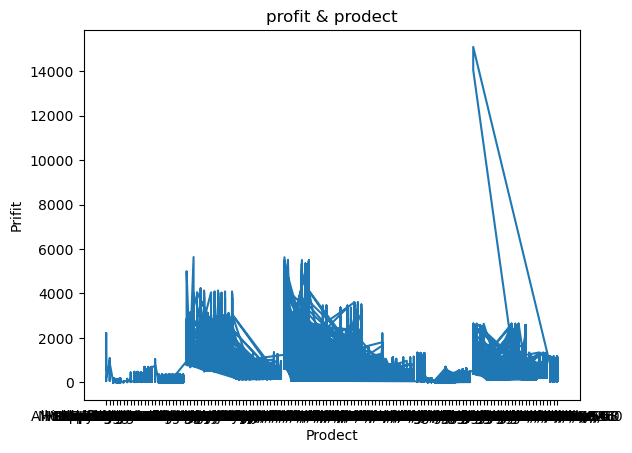

In [20]:
plt.plot(x, y)    
plt.xlabel('Prodect')  
plt.ylabel('Prifit')  
plt.title('profit & prodect')  
plt.show() 

In [21]:
df['Profit'].value_counts()

Profit
3       1493
6       1434
15      1373
12      1331
17      1232
        ... 
1931       1
1865       1
2184       1
1955       1
786        1
Name: count, Length: 1256, dtype: int64

# train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22607,), (90429,), (22607,), (90429,))

# get feature text conversion to tokens 

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv=CountVectorizer(lowercase=True,analyzer="word",ngram_range=(2,3),stop_words='english',max_features=50000)

In [29]:
x_train=cv.fit_transform(x_train)

In [30]:
cv.get_feature_names_out()

array(['100 black', '100 black 38', '100 black 42', '100 black 44',
       '100 black 48', '100 helmet', '100 helmet black',
       '100 helmet blue', '100 helmet red', '100 silver', '100 silver 38',
       '100 silver 42', '100 silver 44', '100 silver 48', '1000 blue',
       '1000 blue 46', '1000 blue 50', '1000 blue 54', '1000 blue 60',
       '1000 yellow', '1000 yellow 46', '1000 yellow 50',
       '1000 yellow 54', '1000 yellow 60', '150 red', '150 red 44',
       '150 red 48', '150 red 52', '150 red 56', '150 red 62',
       '200 black', '200 black 38', '200 black 42', '200 black 46',
       '200 silver', '200 silver 38', '200 silver 42', '200 silver 46',
       '2000 blue', '2000 blue 46', '2000 blue 50', '2000 blue 54',
       '2000 blue 60', '250 black', '250 black 44', '250 black 48',
       '250 black 52', '250 black 58', '250 red', '250 red 44',
       '250 red 48', '250 red 52', '250 red 58', '30 oz', '3000 blue',
       '3000 blue 44', '3000 blue 50', '3000 blue 54', '30

In [31]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
x_test=cv.fit_transform(x_test)

In [33]:
cv.get_feature_names_out()


array(['100 black', '100 black 38', '100 black 42', '100 black 44',
       '100 black 48', '100 helmet', '100 helmet black',
       '100 helmet blue', '100 helmet red', '100 silver', '100 silver 38',
       '100 silver 42', '100 silver 44', '100 silver 48', '1000 blue',
       '1000 blue 46', '1000 blue 50', '1000 blue 54', '1000 blue 60',
       '1000 yellow', '1000 yellow 46', '1000 yellow 50',
       '1000 yellow 54', '1000 yellow 60', '150 red', '150 red 44',
       '150 red 48', '150 red 52', '150 red 56', '150 red 62',
       '200 black', '200 black 38', '200 black 42', '200 black 46',
       '200 silver', '200 silver 38', '200 silver 42', '200 silver 46',
       '2000 blue', '2000 blue 46', '2000 blue 50', '2000 blue 54',
       '2000 blue 60', '250 black', '250 black 44', '250 black 48',
       '250 black 52', '250 black 58', '250 red', '250 red 44',
       '250 red 48', '250 red 52', '250 red 58', '30 oz', '3000 blue',
       '3000 blue 44', '3000 blue 50', '3000 blue 54', '30

In [34]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# GET model train

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
model=MultinomialNB()

In [38]:
model.fit(x_train,y_train)

MultinomialNB()

# get model prediction

In [40]:
y_pred=model.predict(x_test)

In [41]:
y_pred.shape

(90429,)

In [42]:
y_pred

array([ 134,  227,  227, ...,  606, 1335,    0], dtype=int64)

# Get Probability of each predicted class

In [44]:
model.predict_proba(x_test)

array([[8.65783960e-06, 8.85166471e-06, 9.05131888e-06, ...,
        1.67551439e-05, 3.01052099e-05, 1.67551439e-05],
       [1.09296808e-08, 1.13405254e-08, 1.17700424e-08, ...,
        2.06927649e-08, 3.46168614e-08, 2.06927649e-08],
       [1.09296808e-08, 1.13405254e-08, 1.17700424e-08, ...,
        2.06927649e-08, 3.46168614e-08, 2.06927649e-08],
       ...,
       [2.62019845e-07, 2.71869122e-07, 2.82166035e-07, ...,
        4.96072591e-07, 1.65975655e-06, 9.92145182e-07],
       [2.19916096e-09, 2.28182701e-09, 2.36825011e-09, ...,
        1.12416958e-07, 8.70657290e-07, 1.12416958e-07],
       [1.43508651e-07, 1.46721413e-07, 1.20024636e-06, ...,
        2.77726108e-07, 4.99011098e-07, 2.77726108e-07]])

# get model Evaluation

In [46]:
from sklearn.metrics import confusion_matrix,classification_report 

In [47]:
print(confusion_matrix(y_test,y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
print(classification_report(y_test,y_pred))

D:\anacondia\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         -30       0.00      0.00      0.00         1
         -25       0.00      0.00      0.00         2
         -24       0.00      0.00      0.00         2
         -22       0.00      0.00      0.00         1
         -19       0.00      0.00      0.00         1
         -18       0.00      0.00      0.00         1
         -16       0.00      0.00      0.00         1
         -13       0.00      0.00      0.00         1
         -12       0.00      0.00      0.00         2
          -5       0.00      0.00      0.00         3
          -4       0.00      0.00      0.00         9
          -3       0.00      0.00      0.00        11
          -2       0.00      0.00      0.00        11
          -1       0.00      0.00      0.00         8
           0       0.08      0.80      0.15       348
           1       0.05      0.75      0.10       749
           2       0.00      0.00      0.00       957
           3       0.00    

D:\anacondia\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacondia\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Explanation 

In [ ]:
we are import library pandas, numpy, matplotlib (like: import pandas as pd) the we well import data set with the help of pd.read_csv and dataset name are sales_data then find first four starting data using head() funtion and find info ,shape(columns,row),sum of null values then we will define target y and feature x , find columns name with help of df.columns command  and  prodect store in x variable and profit are store in y variable  now import train_test_split library from sklearn.model_sllection  and split the data train_size=0.2 it mies 20 % data are train and othr 80% are test  now to prediction the data with help of model.prediction in x_test data and find shape of y_pred  and last spet are find the confusion matrix with help of (confusion_matrix(y_test,y_pred) and find out classification_report with the help of (classificion_report (y_test,y_pred) command 